In [1]:
from sympy import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# from scipy import integrate

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)

In [12]:
EE = symbols('E_E', constant=True)
EI = symbols('E_I', constant=True)
EL = symbols('E_L', constant=True)
tauE = symbols('tau_E', constant=True, positive=True)
tauA = symbols('tau_A', constant=True, positive=True)
tauN = symbols('tau_N', constant=True, positive=True)
tauI = symbols('tau_I', constant=True, positive=True)
tauL = symbols('tau_L', constant=True, positive=True)
tau = symbols('tau', constant=True, positive=True)
sigmaV = symbols('sigma_V', constant=True, positive=True)
nu = symbols('nu', constant=True, positive=True)
mu = symbols('mu', constant=True, positive=True)
sigmaE = symbols('sigma_E', constant=True, positive=True)
sigmaI = symbols('sigma_I', constant=True, positive=True)
V = symbols('V', positive=False)
wE = symbols('w_E', constant=True, positive=True)
wI = symbols('w_I', constant=True, positive=True)
KE = symbols('K_E', constant=True, positive=True)
KI = symbols('K_I', constant=True, positive=True)
nuE = symbols('nu_E', constant=True, positive=True)
alpha = symbols('alpha', constant=True, positive=True)
beta = symbols('beta', constant=True)
gamma = symbols('gamma', constant=True)
Mg = symbols('[Mg^2+]')
muA = wE*KE*nu*tauA
muN = wE*KE*nu*tauN
muI = wI*KI*nu*tauI
sigmaA = wE*sqrt(KE*nu*tauA)
sigmaN = wE*sqrt(KE*nu*tauN)
sigmaI = wI*sqrt(KI*nu*tauI)
s = 1
tau = tauL/(1 + (1 - alpha)*muA + alpha*s*muN + muI)
mu = (tau/tauL)*(EL + ((1 - alpha)*muA + alpha*s*muN)*EE + muI*EI)


W0 = (mu - V) / tau
WA = (1 - alpha) * sigmaA * (EE - V) / tauL
WN = alpha * s * sigmaN * (EE - V) / tauL
WI = sigmaI * (EI - V) / tauL
dW0 = diff(W0, V)
dWA = diff(WA, V)
dWN = diff(WN, V)
dWI = diff(WI, V)

S0 = -W0
SA = (1/2) * WA / (1 - tauA*(dW0 - (dWA / WA) * W0))
SN = (1/2) * WN / (1 - tauN*(dW0 - (dWN / WN) * W0))
SI = (1/2) * WI / (1 - tauI*(dW0 - (dWI / WI) * W0))
FA = (1 - tauA*(dW0 - (dWA / WA) * W0))
FN = (1 - tauN*(dW0 - (dWN / WN) * W0))
dSA = diff(SA, V)
dSN = diff(SN, V)
dSI = diff(SI, V)

Xi = ((WA*SA + WN*SN + WI*SI))

B = (S0 + (WA * dSA) + (WN * dSN) + (WI * dSI)) / Xi
H = Heaviside(V - EL)/Xi
H = H.subs({EE:0, EL:-60, tauL:20, tauA:5, tauN:100, KE:400, nu:0.02, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100, alpha:0.7, beta:0.062, gamma:3.57, Mg:1})
B = B.subs({EE:0, EL:-60, tauL:20, tauA:5, tauN:100, KE:400, nu:0.02, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100, alpha:0.7, beta:0.062, gamma:3.57, Mg:1})
FA = FA.subs({EE:0, EL:-60, tauL:20, tauA:5, tauN:100, KE:400, nu:0.02, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100, alpha:0.7, beta:0.062, gamma:3.57, Mg:1})
WA = WA.subs({EE:0, EL:-60, tauL:20, tauA:5, tauN:100, KE:400, nu:0.02, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100, alpha:0.7, beta:0.062, gamma:3.57, Mg:1})
H = lambdify(V,H)
B = lambdify(V,B)
FA = lambdify(V,FA)
WA = lambdify(V,WA)


# simplify(sAN)


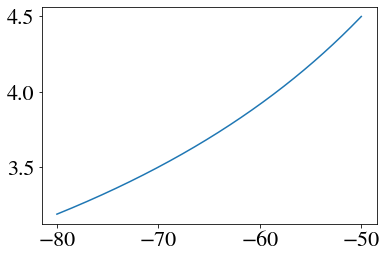

In [13]:
vec_Vk = np.linspace(-80, -50, 30000 + 1, dtype=np.longdouble)
plt.plot(vec_Vk, FA(vec_Vk))

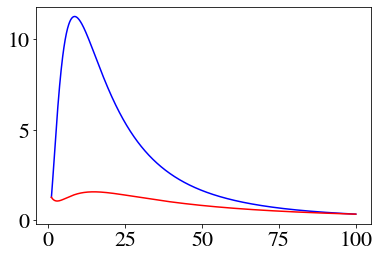

In [22]:
sAN_f = lambdify(tauE, sAN.subs({EE:0, EL:-60, tauL:20, tauA:1, tauN:100, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
sE_f = lambdify(tauE, sE.subs({EE:0, EL:-60, tauL:20, tauA:1, tauN:100, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))

vec_x = np.linspace(1, 100, 1000)
plt.plot(vec_x, sE_f(vec_x), 'b-')
plt.plot(vec_x, sAN_f(vec_x), 'r-')
# sAN.subs({EE:0, EL:-60, tauL:20, tauA:5, tauN:100, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100})

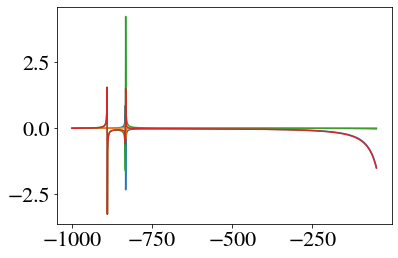

In [71]:
f0 = lambdify(V, B0.subs({EE:0, EL:-60, tauL:20, tauE:100, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
fE = lambdify(V, BE.subs({EE:0, EL:-60, tauL:20, tauE:100, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
fI = lambdify(V, BI.subs({EE:0, EL:-60, tauL:20, tauE:100, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
f = lambdify(V, B.subs({EE:0, EL:-60, tauL:20, tauE:100, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
vec_x = np.linspace(-1000, -50, 1000)
plt.plot(vec_x, f0(vec_x))
plt.plot(vec_x, fE(vec_x))
plt.plot(vec_x, fI(vec_x))
plt.plot(vec_x, f(vec_x))

In [ ]:
x = symbols('x')
an = symbols('a_n', constant=True)
bn = symbols('b_n', constant=True)
cn = symbols('c_n', constant=True)
dn = symbols('d_n', constant=True)

ad = symbols('a_d', constant=True)
bd = symbols('b_d', constant=True)
cd = symbols('c_d', constant=True)
dd = symbols('d_d', constant=True)
ed = symbols('e_d', constant=True)

num_generic = poly(an*x + bn*x**2 + cn*x**3 + dn*x**4)
den_generic = poly(ad*x + bd*x**2 + cd*x**3 + dd*x**4 + ed*x**5)

expression = num_generic/den_generic

integrate(expression, x)


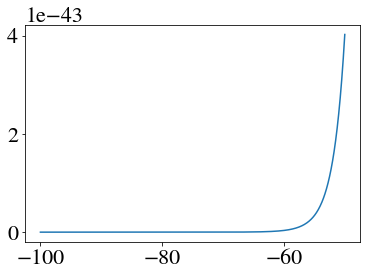

In [28]:
IE_is = IE_i.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nuE:0.005, wE:0.4})

IE_if = lambdify(V, IE_is)
vec_x = np.linspace(-100, -50, 1000)
vec_IE = IE_if(vec_x)

plt.plot(vec_x, vec_IE)


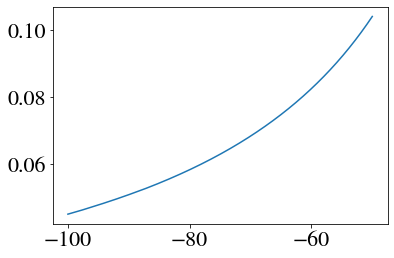

In [45]:
def IE(x):
    return integrate.quad(IE_if, -np.inf, x, limit=1000)[0]
IE = np.vectorize(IE)
integrand = ((EE - V)**(2*tauL**2/(sigmaE**2*tau*tauE))/hE*exp(LE)).subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nuE:0.005, wE:0.4})
ii = lambdify(V, integrand)
vec_ii = ii(vec_x)*IE(vec_x)

plt.plot(vec_x, vec_ii)
# integrand

In [21]:
simplify((hE*FE).subs({V:mu}))

sigma_E**2*tau*tau_E*(E_E - mu)**2/(2*tau_L**2*(tau + tau_E))

In [13]:
integrand = simplify((EE - V)**(-tau/(sigmaE**2*tau**4))*exp(-LE)/FE)
integrands = simplify(integrand.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nuE:0.005, wE:0.4}))


# f = lambdify(V, integrands)
# data = np.linspace(-100, -50, 1000)
# plt.plot(data, f(data))
integrands

sqrt(5)*(-V)**(-2.009765625)*(26.5165042944955 - 1.76776695296637*V)*exp((29.296875 - 11.71875*V)/V**2)

In [5]:
x = symbols('x')
integrand = (V - mu)/(hE*FE*tau)
I = simplify(integrand)
I
simplify(integrate(I, V))

tau_L**2*(2*E_E**2*tau - E_E**2*tau_E - 2*E_E*mu*tau - 2*V*(E_E*tau - E_E*tau_E - mu*tau + mu*tau_E) + mu**2*tau_E + 2*tau*(E_E**2 - 2*E_E*V + V**2)*log(-E_E + V))/(sigma_E**2*tau**2*tau_E*(E_E**2 - 2*E_E*V + V**2))

In [21]:
# hA/(1 + (tauA/tau)*(1 - (dhAdV/hA)*(V-mu)))
hA
FAs

-0.113137084989848*V**2/(V - 15)

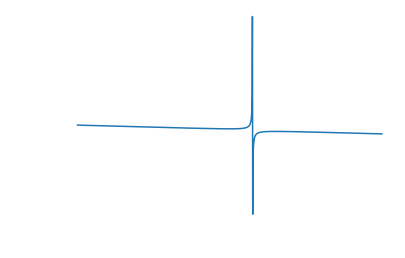

In [22]:
FA = simplify(FA)
FAs = simplify(FA.subs({EE:0, EL:-60, tauL:20, tauA:5, KE:400, nuE:0.005, wE:0.4}))

f = lambdify(V, FAs)
data = np.linspace(-100, 100, 1000)
plt.plot(data, f(data))

In [42]:
x = symbols('x')
# FA = symbols('F_A')

exponent = (-tauL**2*(EE - mu)/(sigmaA**2*tau**2*tauA*(EE - V)) * (2*tau - tauA*(EE - 2*V + mu)/(EE-V)))
# exponent

coeff = ((EE - V)**(-2*tauL**2/(sigmaA**2*tau*tauA)))/FA
coeff

integrand = coeff*exp(exponent)
integrand = simplify(integrand)
# integrand

# integrand
# I = integrate(integrand, (V, -oo, x))
# collect(collect(collect(collect(factor(GA), log(-EE + V)), V), EE), mu)
# integrand.subs

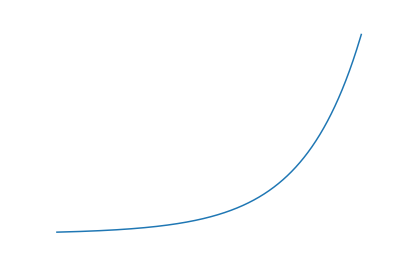

In [47]:
expr = integrand.subs({EE:0, EL:-60, tauL:20, tauA:5, KE:400, nuE:0.005, wE:0.4})
expr = simplify(expr)
f = lambdify(V, expr)
data = np.linspace(-60, -50, 1000)
# f(data)
plt.plot(data, f(data))
# expr

In [57]:
C = (tauL*sqrt(tauA)/(sigmaA*tau**2))*(tau*(EE-V) + tauA*(EE-mu))/(V-EE)**(2*(1+tauL**2/(tauA*tau*sigmaA**2)))
exponential = exp(-tauL**2*(EE**2*(2 - tauA/tau) - 2*EE*mu - 2*V*(EE-mu)*(1 - tauA/tau) + mu**2*tauA/tau)/(sigmaA**2*tau*tauA*(EE-V)**2))

expr = simplify(C*exponential).subs({EE:0, EL:-60, tauL:20, tauA:5, KE:400, nuE:5, wE:0.1})
f = lambdify(V, expr)
data = np.linspace(-100, -50, 100)
# f(data)
expr

5.005*sqrt(5)*V**(-82.08)*(300 - 20*V)*exp(0.002*(-598200.0*V - 18000)/V**2)

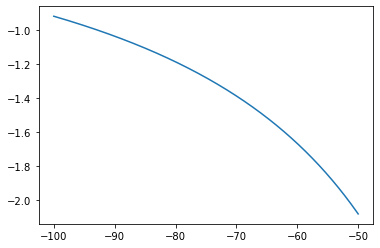

In [32]:
tauA**2